## **2조 미니 프로젝트3**

## 1. 라이브러리 및 데이터 불러오기

- 프로젝트에 사용할 라이브러리 가져오기
- matplotlib 한글 깨짐방지를 위한 코드 실행하기

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='NanumBarunGothic')

import warnings
warnings.filterwarnings(action='ignore')

프로젝트에 사용할 데이터 불러오기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/movies_train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks//movies_test.csv')
submission = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/submission.csv')

## 2. 데이터 전처리

**데이터셋(Dataset)의 내용**

1. movies_train.csv / movies_test.csv의 칼럼 내용
- title : 영화의 제목
- distributer : 배급사
- genre : 장르
- release_time : 개봉일
- time : 상영시간(분)
- screening_rat : 상영등급
- director : 감독 이름
- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객 수 (단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수 (단 관객수가 알려지지 않은 영화 제외)
- num_staff : 스텝 수
- num_actor : 주연 배우 수
- box_off_num : 관객 수

2. submission.csv 데이터 상세 설명
- 2010년대 한국에서 개봉한 한국영화 600개에 대한 감독, 이름, 상영등급, 관객수 등의 정보가 담긴 데이터

**각 데이터셋 확인**

In [5]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


In [6]:
test.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
0,용서는 없다,시네마서비스,느와르,2010-01-07,125,청소년 관람불가,김형준,3.005290e+05,2,304,3
1,아빠가 여자를 좋아해,(주)쇼박스,멜로/로맨스,2010-01-14,113,12세 관람가,이광재,3.427002e+05,4,275,3
2,하모니,CJ 엔터테인먼트,드라마,2010-01-28,115,12세 관람가,강대규,4.206611e+06,3,419,7
3,의형제,(주)쇼박스,액션,2010-02-04,116,15세 관람가,장훈,6.913420e+05,2,408,2
4,평행 이론,CJ 엔터테인먼트,공포,2010-02-18,110,15세 관람가,권호영,3.173800e+04,1,380,1


In [7]:
submission.head()

,title,box_off_num
0,용서는 없다,0
1,아빠가 여자를 좋아해,0
2,하모니,0
3,의형제,0
4,평행 이론,0


**각 데이터 요약 및 요약 통계량 확인**

1. shape ( ) 이용

In [8]:
print(train.shape)
print(test.shape)
print(submission.shape)

(600, 12)
(243, 11)
(243, 2)


- train의 경우, 600개의 행과 12개의 columns로 이루어짐
- test의 경우, 243개의 행과 11개의 columns로 이루어짐 (box_off_num 제외)
- submission의 경우, 243개의 행과 2개의 columns로 이루어짐

  -> 즉, 600개의 데이터를 학습시켜 243개의 데이터에 대한 예측을 진행

2. info ( ) 이용

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           243 non-null    object 
 1   distributor     243 non-null    object 
 2   genre           243 non-null    object 
 3   release_time    243 non-null    object 
 4   time            243 non-null    int64  
 5   screening_rat   243 non-null    object 
 6   director        243 non-null    object 
 7   dir_prev_bfnum  107 non-null    float64
 8   dir_prev_num    243 non-null    int64  
 9   num_staff       243 non-null    int64  
 10  num_actor       243 non-null    int64  
dtypes: float64(1), int64(4), object(6)
memory usage: 21.0+ KB


train과 test 데이터셋을 info( )로 전반적인 구조를 확인하여 다음과 같은 전처리가 필요한 것을 확인할 수 있었음.
1. dir_prev_bfnum에서만 Non-Null의 수가 적은 것으로 보아 **결측치가 확인**되는 것을 알 수 있음

    -> dir_prev_dfnum은 **관객수** 이므로 결측값의 형태를 확인하고, int형이 아니라면 int형인 0으로 바꿔야함
2. release_time의 경우 **날짜 / 시간에 관련된 데이터**인데, 회귀모델은 datetime64 형식을 학습에 사용할 수 없음

    ->  각각 연도, 월을 분리하여 숫자형 피처로 변환


**결측치 확인 및 데이터 전처리**

1-1. 결측치 확인

isna()를 이용하여 결측치에 대한 개수를 확인

In [11]:
train.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [12]:
test.isna().sum()

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,136
dir_prev_num,0
num_staff,0


train 데이터에는 dir_prev_bfnum에 대하여 330개의 결측값이, test 데이터에는 136개의 결측값이 존재

 -> 결측값의 형태 확인

In [13]:
train[train['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [14]:
test[test['dir_prev_bfnum'].isna()].head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor
5,회오리 바람,모쿠슈라,드라마,2010-02-25,95,15세 관람가,장건재,NaN,0,156,2
6,경계도시 2,시네마 달,다큐멘터리,2010-03-18,104,15세 관람가,홍형숙,NaN,0,11,2
7,이웃집 남자,(주)루믹스미디어,드라마,2010-03-18,100,청소년 관람불가,장동홍,NaN,0,117,5
8,아마존의 눈물 극장판,마운틴픽쳐스,다큐멘터리,2010-03-25,88,15세 관람가,김진만,NaN,0,76,1
9,반가운 살인자,롯데쇼핑(주)롯데엔터테인먼트,코미디,2010-04-08,107,15세 관람가,김동욱,NaN,0,255,3


1-2 데이터 전처리

1. 날짜 분해 --> release_time을 year, month으로 쪼갬 (train. test 모두 적용) -> 원핫 인코딩
2. 배급사, 감독 --> 빈도 계산 후 피처 추가 기존 피처 드랍
3. title, release_time,  dir_prev_bfnum 드랍
4. genre, screening_rat --> 원핫 인코딩
5. dir_prev_num, num_staff, num_actor, 타겟값 --> 로그 변환

In [15]:
import pandas as pd
import numpy as np

# 1. 날짜 분해 (release_time → year, month)
def decompose_date(df):
    df['release_time'] = pd.to_datetime(df['release_time'])
    df['year'] = df['release_time'].dt.year
    df['month'] = df['release_time'].dt.month
    return df

train = decompose_date(train)
test = decompose_date(test)

# 2. 배급사, 감독 → 빈도 기반 피처 추가
for col in ['distributor', 'director']:
    freq = train[col].value_counts()
    train[f'{col}_freq'] = train[col].map(freq)
    test[f'{col}_freq'] = test[col].map(freq).fillna(0)  # 테스트셋엔 없는 경우 0 처리

# 3. title, release_time, dir_prev_bfnum 제거
drop_cols = ['title', 'release_time', 'dir_prev_bfnum', 'distributor', 'director']
train.drop(columns=drop_cols, inplace=True)
test.drop(columns=drop_cols, inplace=True)

# 4. genre, screening_rat, year, month → 원-핫 인코딩(열 정렬 수행)
train = pd.get_dummies(train, columns=['genre', 'screening_rat', 'year', 'month'])
test = pd.get_dummies(test, columns=['genre', 'screening_rat', 'year', 'month'])

train, test = train.align(test, join='left', axis=1, fill_value=0)

# 5. 로그 변환
log_cols = ['dir_prev_num', 'num_staff', 'num_actor']
for col in log_cols:
    train[col] = np.log1p(train[col])
    test[col] = np.log1p(test[col])

# 타겟값인 box_off_num 로그 변환
train['box_off_num'] = np.log1p(train['box_off_num'])

In [16]:
train.head(5)

,time,dir_prev_num,num_staff,num_actor,box_off_num,distributor_freq,director_freq,genre_SF,genre_공포,genre_느와르,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,96,0.000000,4.521789,1.098612,10.060449,52,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,130,1.098612,5.961005,1.386294,15.771725,26,4,False,False,True,...,False,False,False,False,False,False,False,False,True,False
2,123,1.609438,5.840642,1.609438,15.755558,26,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
3,101,1.098612,3.044522,1.945910,12.291640,30,1,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,108,0.693147,5.529429,1.098612,13.088575,2,1,False,False,False,...,False,False,False,False,False,False,False,False,True,False


In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    600 non-null    int64  
 1   dir_prev_num            600 non-null    float64
 2   num_staff               600 non-null    float64
 3   num_actor               600 non-null    float64
 4   box_off_num             600 non-null    float64
 5   distributor_freq        600 non-null    int64  
 6   director_freq           600 non-null    int64  
 7   genre_SF                600 non-null    bool   
 8   genre_공포                600 non-null    bool   
 9   genre_느와르               600 non-null    bool   
 10  genre_다큐멘터리             600 non-null    bool   
 11  genre_드라마               600 non-null    bool   
 12  genre_멜로/로맨스            600 non-null    bool   
 13  genre_뮤지컬               600 non-null    bool   
 14  genre_미스터리              600 non-null    bo

In [18]:
test.head(5)

,time,dir_prev_num,num_staff,num_actor,box_off_num,distributor_freq,director_freq,genre_SF,genre_공포,genre_느와르,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,125,1.098612,5.720312,1.386294,0,6.0,0.0,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,113,1.609438,5.620401,1.386294,0,26.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,115,1.386294,6.040255,2.079442,0,54.0,0.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,116,1.098612,6.013715,1.098612,0,26.0,1.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,110,0.693147,5.942799,0.693147,0,54.0,0.0,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [19]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   time                    243 non-null    int64  
 1   dir_prev_num            243 non-null    float64
 2   num_staff               243 non-null    float64
 3   num_actor               243 non-null    float64
 4   box_off_num             243 non-null    int64  
 5   distributor_freq        243 non-null    float64
 6   director_freq           243 non-null    float64
 7   genre_SF                243 non-null    bool   
 8   genre_공포                243 non-null    bool   
 9   genre_느와르               243 non-null    bool   
 10  genre_다큐멘터리             243 non-null    bool   
 11  genre_드라마               243 non-null    bool   
 12  genre_멜로/로맨스            243 non-null    bool   
 13  genre_뮤지컬               243 non-null    bool   
 14  genre_미스터리              243 non-null    bo

##3. EDA (데이터 시각화)
**타깃변수인 box_off_num의 분포 확인**

<Axes: xlabel='box_off_num', ylabel='Count'>

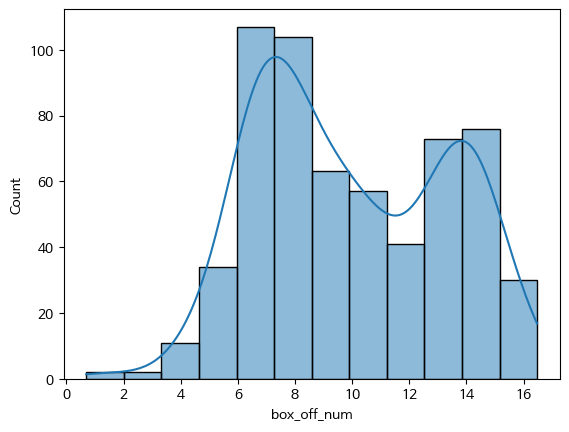

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(train['box_off_num'], kde=True)

**box_off_num과 나머지 변수의 상관관계 히트맵**

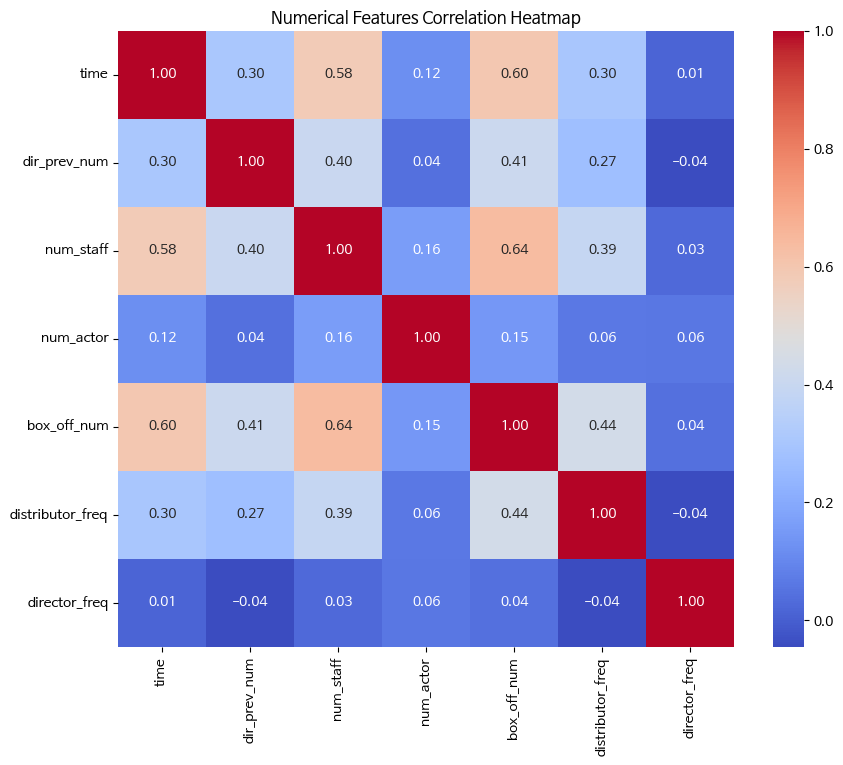

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = train.select_dtypes(include=['int64', 'float64'])
matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Numerical Features Correlation Heatmap')
plt.show()

##4-1. GridSearchCV를 이용한 회귀 모델 적용

✅ 4. 회귀 모델 적용 프로세스
1. 하이퍼파라미터 튜닝을 위한 검증 RMSE 계산 수행  (GridSearchCV 활용)
- GridSearchCV를 사용하여 각 회귀 모델( Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM, LinearRegression, GradientBoosting)에 대해 간단한 하이퍼파라미터 탐색을 수행

- 8개 모델에 대한 검증 RMSE를 확인하여 상위 3-4개의 모델(best_model)을 획득


2. 상위 3-4개의 모델에 대한 하이퍼파라미터 튜닝
- 각 모델에 대한 정밀화된 최적 하이퍼파라미터 탐색

3. 튜닝된 상위보델을 바탕으로 가중치 기반 블렌딩 수행
- 선택된 모델들의 최적의 하이퍼파라미터를 저장하여 학습 및 예측

- 예측된 RMSE를 계산하여 이에 대한 블렌딩을 준비

4. 가중치 기반 블렌딩
- 각 모델의 RMSE 역수를 활용해 가중치 계산

- RMSE가 낮을수록 높은 가중치 부여하도록 설정

- 예측값을 가중 평균하여 최종 y_pred 값을 생성


In [22]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# 1. X/y 분리
X = train.drop('box_off_num', axis=1)
y = train['box_off_num']

# 2. train/test 분리
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=156)

# 3. 모델과 파라미터 정의
models = {
    "LinearRegression": (LinearRegression(), {}),
    "ElasticNet": (ElasticNet(), {"alpha": [0.1, 1.0, 10.0], "l1_ratio": [0.2, 0.5, 0.8]}),
    "Ridge": (Ridge(), {"alpha": [0.1, 10.0, 20.0]}),
    "Lasso": (Lasso(), {"alpha": [0.1, 10.0, 20.0]}),
    "RandomForest": (RandomForestRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5]}),
    "GradientBoosting": (GradientBoostingRegressor(random_state=156), {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}),
    "XGBoost": (XGBRegressor(random_state=156, verbosity=0), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]}),
   "LightGBM": (LGBMRegressor(random_state=156), {"n_estimators": [100, 200], "max_depth": [3, 5], "learning_rate": [0.05, 0.1]})
}


results = []

# 5. 반복 학습 및 성능 저장
for name, (model, param_grid) in models.items():
    print(f"Training {name}...")

    if param_grid:
        grid = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1)
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        best_params = grid.best_params_
    else:
        model.fit(X_train, y_train)
        best_model = model
        best_params = {}

    # 검증셋 예측 및 RMSE 계산
    val_pred = best_model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, val_pred))
    print(f"{name} RMSE: {rmse:.4f}, Best Params: {best_params}")

    results.append({
        "Model": name,
        "RMSE": rmse,
        "BestParams": best_params
    })

# 6. 결과 정리
results_df = pd.DataFrame(results).sort_values(by="RMSE")
print("\n--- 최종 성능 비교 ---")
print(results_df)

Training LinearRegression...
LinearRegression RMSE: 2.2439, Best Params: {}
Training ElasticNet...
ElasticNet RMSE: 2.2056, Best Params: {'alpha': 0.1, 'l1_ratio': 0.2}
Training Ridge...
Ridge RMSE: 2.1931, Best Params: {'alpha': 20.0}
Training Lasso...
Lasso RMSE: 2.2530, Best Params: {'alpha': 0.1}
Training RandomForest...
RandomForest RMSE: 1.8372, Best Params: {'max_depth': 5, 'n_estimators': 200}
Training GradientBoosting...
GradientBoosting RMSE: 1.8513, Best Params: {'learning_rate': 0.05, 'n_estimators': 200}
Training XGBoost...
XGBoost RMSE: 1.8292, Best Params: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
Training LightGBM...
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000065 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[L

최종 성능

-          XGBoost : 1.829166   
-          LightGBM : 1.829999   
-      RandomForest : 1.837194   
-  GradientBoosting : 1.851270   
-             Ridge : 2.193144   
-        ElasticNet : 2.205594   
-  LinearRegression : 2.243920   
-             Lasso : 2.253033

📌 RMSE 기준 성능 상위 4개의 모델은 다음과 같음: XGBoost / LightGBM / RandomForest / GradientBoosting

✅ GridSearchCV를 이용하여 상위 4개의 모델에 대한 정밀 하이퍼파라미터 튜닝 진행

In [23]:
# XGBoost 튜닝
from xgboost import XGBRegressor

xgb_model = XGBRegressor(random_state=156)
xgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.05, 0.1, 0.15],
    'subsample': [0.8, 1.0]
}

xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
xgb_grid.fit(X_train, y_train)
print("XGBoost Best Params:", xgb_grid.best_params_)

XGBoost Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}


In [24]:
# LightGBM 튜닝
from lightgbm import LGBMRegressor

lgb_model = LGBMRegressor(random_state=156)
lgb_params = {
    'n_estimators': [100, 150, 200],
    'max_depth': [4, 5, 6],
    'learning_rate': [0.03, 0.05, 0.07],
    'num_leaves': [31, 50, 70]
}

lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
lgb_grid.fit(X_train, y_train)
print("LightGBM Best Params:", lgb_grid.best_params_)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

In [25]:
# RandomForest 튜닝
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=156)
rf_params = {
    'n_estimators': [180, 200, 220],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 5, 10]
}

rf_grid = GridSearchCV(rf_model, rf_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
rf_grid.fit(X_train, y_train)
print("RandomForest Best Params:", rf_grid.best_params_)

RandomForest Best Params: {'max_depth': 9, 'min_samples_split': 2, 'n_estimators': 220}


In [26]:
# Gradient Boosting 튜닝
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor(random_state=156)
gbr_params = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.03, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

gbr_grid = GridSearchCV(gbr_model, gbr_params, cv=5, scoring='neg_root_mean_squared_error', n_jobs=-1)
gbr_grid.fit(X_train, y_train)
print("GradientBoosting Best Params:", gbr_grid.best_params_)

GradientBoosting Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}


✅ 모델 블렌딩 수행

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np


# 1. 각 모델을 best_estimator_로 재학습
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)
gbr_best = GradientBoostingRegressor(**gbr_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)
gbr_best.fit(X_train, y_train)

# 2. 최적의 하이퍼 파라미터로 예측
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)
pred_gbr = gbr_best.predict(X_test)

# 3. 최적의 RMSE 계산
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))
print("GradientBoosting RMSE:", rmse(y_test, pred_gbr))

# 4. 가중치 설정
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf),
    rmse(y_test, pred_gbr)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test 데이터 예측 (train 전체로 다시 학습)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)
gbr_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred) +
    weights[3] * gbr_best.predict(X_test_pred)
)

# 6. 예측 결과 역로그
pred_test_final = np.expm1(pred_test)

# 7. 제출 파일 생성
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_4.csv', index=False)
print("✅ 상위 4개 모델 블렌딩 예측 완료")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000130 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

✅ 최종 모델 적용 및 리더보드 결과

적용한 회귀 모델 (총 4종): RandomForest, LightGBM, XGBoost, GradientBoosting

블렌딩을 통해 생성된 예측 결과를 기반으로 제출한 리더보드 점수: 1444098.52

In [28]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor

# 1. 각 모델을 best_estimator_로 재학습
xgb_best = XGBRegressor(**xgb_grid.best_params_, random_state=156)
lgb_best = LGBMRegressor(**lgb_grid.best_params_, random_state=156)
rf_best = RandomForestRegressor(**rf_grid.best_params_, random_state=156)

xgb_best.fit(X_train, y_train)
lgb_best.fit(X_train, y_train)
rf_best.fit(X_train, y_train)

# 2. 최적의 하이퍼 파라미터로 예측
pred_xgb = xgb_best.predict(X_test)
pred_lgb = lgb_best.predict(X_test)
pred_rf = rf_best.predict(X_test)

# 3. 최적의 RMSE 계산 함수
def rmse(i, pred):
    mse = mean_squared_error(i, pred)
    return np.sqrt(mse)

print("XGBoost RMSE:", rmse(y_test, pred_xgb))
print("LightGBM RMSE:", rmse(y_test, pred_lgb))
print("RandomForest RMSE:", rmse(y_test, pred_rf))

# 4. 가중치 설정
errors = np.array([
    rmse(y_test, pred_xgb),
    rmse(y_test, pred_lgb),
    rmse(y_test, pred_rf)
])
inv_errors = 1 / errors
weights = inv_errors / np.sum(inv_errors)

print("Blending Weights:", weights)

# 5. test 데이터 예측 (train 전체로 다시 학습)
X_test_pred = test[X.columns]

xgb_best.fit(X, y)
lgb_best.fit(X, y)
rf_best.fit(X, y)

pred_test = (
    weights[0] * xgb_best.predict(X_test_pred) +
    weights[1] * lgb_best.predict(X_test_pred) +
    weights[2] * rf_best.predict(X_test_pred)
)

# 6. 예측 결과 역로그 변환
pred_test_final = np.expm1(pred_test)

# 7. 제출 파일 생성
submission['box_off_num'] = pred_test_final
submission.to_csv('final_blended_submission_3.csv', index=False)
print("✅ 상위 3개 모델 블렌딩 예측 완료")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 316
[LightGBM] [Info] Number of data points in the train set: 480, number of used features: 35
[LightGBM] [Info] Start training from score 9.941734
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

✅ 최종 모델 적용 및 리더보드 결과

적용한 회귀 모델 (총 3종): RandomForest, LightGBM, XGBoost

블렌딩을 통해 생성된 예측 결과를 기반으로 제출한 리더보드 점수:1452326.55

##4-2. Hyperopt를 이용한 회귀 모델 적용
✅ 4. 회귀 모델 적용 프로세스
1. 하이퍼파라미터 튜닝 (Hyperopt 활용)
- Hyperopt를 사용하여 각 회귀 모델(예: Ridge, Lasso, ElasticNet, RandomForest, XGBoost, LightGBM 등)에 대해 하이퍼파라미터 탐색을 수행합니다.

- 최적의 파라미터를 가진 모델(best_model)을 획득합니다.

2. 모델 학습 및 성능 평가
- 각 모델을 최적 하이퍼파라미터로 학습(fit)시킵니다.

- 검증 데이터에 대한 예측 결과를 바탕으로 RMSE를 계산하여 모델 성능을 비교합니다.

3. 상위 모델 선정
- RMSE 기준으로 성능이 우수한 상위 3~4개 모델을 선택합니다.

- 선택된 모델들의 예측 결과를 기반으로 블렌딩을 수행할 준비를 합니다.

4. 가중치 기반 블렌딩
- 각 모델의 RMSE 역수를 활용해 가중치를 계산합니다.

- RMSE가 낮을수록 높은 가중치 부여

- 예측값을 가중 평균하여 최종 y_pred 값을 생성합니다.

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

# X, y 분리
X = train.drop(columns='box_off_num')
y = train['box_off_num']
X_test= test[X.columns]

In [30]:
from sklearn.model_selection import train_test_split

# X, y는 전체 데이터
X_tra, X_val, y_tra, y_val = train_test_split(X, y, test_size=0.2, random_state=156)

In [31]:
# Ridge 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import numpy as np

# 1. 탐색할 alpha 범위 정의
ridge_search_space = {
    'alpha': hp.quniform('alpha', 0.001, 20.0, 0.005)
}

# 2. 목적 함수 정의
def objective_func_ri(search_space):
    ridge = Ridge(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(ridge, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_ri = fmin(
    fn=objective_func_ri,
    space=ridge_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 alpha를 사용한 모델 학습 및 예측
best_ridge = Ridge(alpha=best_ri['alpha'], random_state=156)
best_ridge.fit(X_tra, y_tra)
ridge_pred = best_ridge.predict(X_val)

# 5. 평가 함수 호출
print('Ridge 결과')
ridge_rmse=np.sqrt(mean_squared_error(y_val, ridge_pred))
print(ridge_rmse)

100%|██████████| 50/50 [00:04<00:00, 10.85trial/s, best loss: 4.515379857997483]
Ridge 결과
2.1979228996544773


In [32]:
# Lasso 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
import numpy as np

# 1. 탐색할 alpha 범위 정의
lasso_search_space = {
    'alpha': hp.quniform('alpha', 0.01, 20.0, 0.005)
}

# 2. 목적 함수 정의
def objective_func_la(search_space):
    lasso = Lasso(alpha=search_space['alpha'], random_state=156)
    mse = cross_val_score(lasso, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_la = fmin(
    fn=objective_func_la,
    space=lasso_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 alpha를 사용한 모델 학습 및 예측
best_lasso = Lasso(alpha=best_la['alpha'], random_state=156)
best_lasso.fit(X_tra, y_tra)
lasso_pred = best_lasso.predict(X_val)

# 5. 평가 함수 호출
print('Lasso 결과')
lasso_rmse=np.sqrt(mean_squared_error(y_val, lasso_pred))
print(lasso_rmse)

100%|██████████| 50/50 [00:01<00:00, 33.19trial/s, best loss: 4.523938328149264]
Lasso 결과
2.1932067673192903


In [33]:
# ElasticNet 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
import numpy as np

# 1. 탐색할 alpha, l1_ratio 범위 정의
elastic_search_space = {
    'alpha': hp.quniform('alpha', 0.1, 20.0, 0.05),
    'l1_ratio': hp.quniform('l1_ratio', 0.001, 1.0, 0.005)
}

# 2. 목적 함수 정의
def objective_func_el(search_space):
    elastic = ElasticNet(alpha=search_space['alpha'],
                         l1_ratio=search_space['l1_ratio'],
                         random_state=156)
    mse = cross_val_score(elastic, X, y, scoring='neg_mean_squared_error', cv=3)
    return {
        'loss': -1 * np.mean(mse),
        'status': STATUS_OK
    }

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_el = fmin(
    fn=objective_func_el,
    space=elastic_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 파라미터로 모델 학습 및 예측
best_elastic = ElasticNet(alpha=best_el['alpha'],
                          l1_ratio=best_el['l1_ratio'],
                          random_state=156)
best_elastic.fit(X_tra, y_tra)
elastic_pred = best_elastic.predict(X_val)

# 5. 평가
print('ElasticNet 결과')
elastic_rmse=np.sqrt(mean_squared_error(y_val, elastic_pred))
print(elastic_rmse)

100%|██████████| 50/50 [00:01<00:00, 30.99trial/s, best loss: 4.854527715236849]
ElasticNet 결과
2.2655304667779625


In [34]:
# Random Forest 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# 1. 탐색할 하이퍼파라미터 공간 정의
rf_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'min_samples_split': hp.quniform('min_samples_split', 2, 10, 1)
}

# 2. 목적 함수 정의
def objective_rf(space):
    rf_clf = RandomForestRegressor(
        n_estimators=int(space['n_estimators']),
        max_depth=int(space['max_depth']),
        min_samples_split=int(space['min_samples_split']),
        random_state=156
    )
    mse = cross_val_score(rf_clf, X_tra, y_tra, cv=3, scoring="neg_mean_squared_error")
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_rf = fmin(
    fn=objective_rf,
    space=rf_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 파라미터로 모델 학습
best_rf_reg = RandomForestRegressor(
    n_estimators=int(best_rf['n_estimators']),
    max_depth=int(best_rf['max_depth']),
    min_samples_split=int(best_rf['min_samples_split']),
    random_state=156
)
best_rf_reg.fit(X_tra, y_tra)

# 5. 예측 및 평가
rf_pred = best_rf_reg.predict(X_val)
print('Random Forest 결과')
rf_rmse=np.sqrt(mean_squared_error(y_val, rf_pred))
print(rf_rmse)

100%|██████████| 50/50 [01:36<00:00,  1.93s/trial, best loss: 3.7547447976140664]
Random Forest 결과
1.8216130744296017


In [35]:
# XGBoost 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor
import numpy as np

# 1. 탐색할 하이퍼파라미터 공간 정의
xgb_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2)
}

# 2. 목적 함수 정의
def objective_func_xgb(search_space):
    xgb_clf = XGBRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        eval_metric='rmse',
        random_state=156
    )
    mse = cross_val_score(xgb_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_xgb = fmin(
    fn=objective_func_xgb,
    space=xgb_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 파라미터로 모델 학습 및 예측
best_xgb_reg = XGBRegressor(
    n_estimators=int(best_xgb['n_estimators']),
    max_depth=int(best_xgb['max_depth']),
    learning_rate=best_xgb['learning_rate'],
    random_state=156
)
best_xgb_reg.fit(X_tra, y_tra)

# 5. 예측 및 평가
xgb_pred = best_xgb_reg.predict(X_val)
print('XGBoost 결과')
xgb_rmse=np.sqrt(mean_squared_error(y_val, xgb_pred))
print(xgb_rmse)

100%|██████████| 50/50 [01:04<00:00,  1.30s/trial, best loss: 3.938207433168681]
XGBoost 결과
1.9064004806667945


In [36]:
# LightGBM 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMRegressor
import numpy as np

# 1. 탐색할 하이퍼파라미터 공간 정의
lgbm_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 250, 50),
    'max_depth': hp.quniform('max_depth', 5, 20, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. 목적 함수 정의
def objective_func_lgbm(search_space):
    lgbm_clf = LGBMRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        eval_metric='rmse',
        verbose=-1,
        random_state=156
    )
    mse = cross_val_score(lgbm_clf, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_lgbm = fmin(
    fn=objective_func_lgbm,
    space=lgbm_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 하이퍼파라미터로 모델 학습 및 예측
best_lgbm_reg = LGBMRegressor(
    n_estimators=int(best_lgbm['n_estimators']),
    max_depth=int(best_lgbm['max_depth']),
    learning_rate=best_lgbm['learning_rate'],
    subsample=best_lgbm['subsample'],
    random_state=156
)
best_lgbm_reg.fit(X_tra, y_tra)

# 5. 예측 및 평가
lgbm_pred = best_lgbm_reg.predict(X_val)
print('LightGBM 결과')
lgbm_rmse=np.sqrt(mean_squared_error(y_val, lgbm_pred))
print(lgbm_rmse)

100%|██████████| 50/50 [00:07<00:00,  6.49trial/s, best loss: 3.9894011411824564]
LightGBM 결과
1.8408233610400904


In [37]:
# Gradient Boosting 회귀 하이퍼파라미터 튜닝 및 모델 학습/평가
from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

# 1. 하이퍼파라미터 탐색 공간 정의
gbrt_search_space = {
    'n_estimators': hp.quniform('n_estimators', 50, 300, 50),
    'max_depth': hp.quniform('max_depth', 3, 10, 1),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.2),
    'subsample': hp.uniform('subsample', 0.7, 1.0)
}

# 2. 목적 함수 정의
def objective_func_gbrt(search_space):
    gbrt = GradientBoostingRegressor(
        n_estimators=int(search_space['n_estimators']),
        max_depth=int(search_space['max_depth']),
        learning_rate=search_space['learning_rate'],
        subsample=search_space['subsample'],
        random_state=156
    )
    mse = cross_val_score(gbrt, X_tra, y_tra, scoring='neg_mean_squared_error', cv=3)
    return {'loss': -1 * np.mean(mse), 'status': STATUS_OK}

# 3. 하이퍼파라미터 최적화 실행
trial_val = Trials()
best_gbrt = fmin(
    fn=objective_func_gbrt,
    space=gbrt_search_space,
    algo=tpe.suggest,
    max_evals=50,
    trials=trial_val,
    rstate=np.random.default_rng(156)
)

# 4. 최적 파라미터로 모델 학습 및 예측
best_gbrt_reg = GradientBoostingRegressor(
    n_estimators=int(best_gbrt['n_estimators']),
    max_depth=int(best_gbrt['max_depth']),
    learning_rate=best_gbrt['learning_rate'],
    subsample=best_gbrt['subsample'],
    random_state=156
)
best_gbrt_reg.fit(X_tra, y_tra)

# 5. 예측 및 평가
gbrt_pred = best_gbrt_reg.predict(X_val)
print('Gradient Boosting 결과')
gbrt_rmse=np.sqrt(mean_squared_error(y_val, gbrt_pred))
print(gbrt_rmse)

100%|██████████| 50/50 [01:09<00:00,  1.40s/trial, best loss: 3.7291194583620126]
Gradient Boosting 결과
1.8104908232436179


In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 모델 학습
lr = LinearRegression()
lr.fit(X_tra, y_tra)

# 예측
lr_pred = lr.predict(X_val)

# RMSE 계산 및 출력
lr_rmse = round(np.sqrt(mean_squared_error(y_val, lr_pred)), 3)
print(lr_rmse)

2.244


In [39]:
pd.DataFrame({'model':['LR','Lasso','Ridge','ElasticNet','GradientBoosting','RF','XGB','LGBM'],
              'rmse':[lr_rmse, lasso_rmse, ridge_rmse, elastic_rmse, gbrt_rmse, rf_rmse, xgb_rmse, lgbm_rmse]})

,model,rmse
0,LR,2.244000
1,Lasso,2.193207
2,Ridge,2.197923
3,ElasticNet,2.265530
4,GradientBoosting,1.810491
5,RF,1.821613
6,XGB,1.906400
7,LGBM,1.840823


📌 RMSE 기준 성능 상위 4개 모델은 다음과 같습니다:
RandomForest, LightGBM, XGBoost, GradientBoosting

이들 모델은 RMSE 값이 가장 낮아, 최종 블렌딩 대상 모델로 선정되었습니다.

In [40]:
# 1. 모델별 RMSE (예: 튜닝 후 얻은 값들)
rmses = {
    'GradientBoosting': gbrt_rmse,
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
gbrt_pred_2= best_gbrt_reg.predict(X_test)
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'GradientBoosting': gbrt_pred_2,
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. 모델 이름 리스트
top_model_names = list(rmses.keys())

# 4. RMSE 역수 기반 가중치 계산
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. 블렌딩 예측 초기화 및 가중 평균 계산
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. 로그 변환 해제 (예측이 log로 되어 있었다면)
final_pred = np.expm1(blended_pred)  # log1p 썼다면
final_pred = np.maximum(0, final_pred)  # 음수 제거
final_pred = np.nan_to_num(final_pred)  # NaN 제거

# 7. 제출 파일 생성
submission['box_off_num'] = final_pred
print("✅ 상위 4개 모델 블렌딩 예측 완료")

✅ 상위 4개 모델 블렌딩 예측 완료


In [41]:
submission.to_csv('submission.csv', index=False)

✅ 최종 모델 적용 및 리더보드 결과

적용한 회귀 모델 (총 4종):
RandomForest, LightGBM, XGBoost, GradientBoosting

블렌딩을 통해 생성된 예측 결과를 기반으로 제출한 리더보드 점수:
1,413,668.67



In [43]:
# 1. 모델별 RMSE (예: 튜닝 후 얻은 값들)
rmses = {
    'RF': rf_rmse,
    'LightGBM': lgbm_rmse,
    'XGBoost': xgb_rmse
}

# 2.
rf_pred_2= best_rf_reg.predict(X_test)
lgbm_pred_2= best_lgbm_reg.predict(X_test)
xgb_pred_2= best_xgb_reg.predict(X_test)
test_preds = {
     'RF': rf_pred_2,
     'LightGBM': lgbm_pred_2,
     'XGBoost': xgb_pred_2
 }

# 3. 모델 이름 리스트
top_model_names = list(rmses.keys())

# 4. RMSE 역수 기반 가중치 계산
inv_rmses = {k: 1/v for k, v in rmses.items()}
total = sum(inv_rmses.values())
weights = {k: v/total for k, v in inv_rmses.items()}

# 5. 블렌딩 예측 초기화 및 가중 평균 계산
blended_pred = np.zeros_like(test_preds[top_model_names[0]], dtype=float)

for name in top_model_names:
    blended_pred += test_preds[name] * weights[name]

# 6. 로그 변환 해제 (예측이 log로 되어 있었다면)
final_pred = np.expm1(blended_pred)  # log1p 썼다면
final_pred = np.maximum(0, final_pred)  # 음수 제거
final_pred = np.nan_to_num(final_pred)  # NaN 제거

# 7. 제출 파일 생성
submission_blended=submission.copy()
submission_blended['box_off_num'] = final_pred
print("✅ 상위 3개 모델 블렌딩 예측 완료")

✅ 상위 3개 모델 블렌딩 예측 완료


In [44]:
submission.to_csv('submission_blended.csv', index=False)

✅ 최종 모델 적용 및 리더보드 결과

적용한 회귀 모델 (총 3종):
RandomForest, LightGBM, XGBoost

블렌딩을 통해 생성된 예측 결과를 기반으로 제출한 리더보드 점수:
1410308.82

